<a href="https://colab.research.google.com/github/omar-shaaban742001/computer_vison_pytorch/blob/master/custom_datasets%20on%20pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##importing torch and setting up device dagnostic

In [ ]:
import torch
from torch import nn


In [ ]:
#set up device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

##Get the datasets

In [ ]:
import requests
import zipfile
from pathlib import Path
#creat paths for the file that will store the data
data_path = Path ("data/")
image_path = data_path / "pizza_steak_sushi"

#check if the dir of the image is exist or not
if image_path.is_dir():
  print (f"{image_path} is already exist...")
else:
  print(f"creating new one{image_path}")
  #creat a new file to store the dataset
  image_path.mkdir(parents=True , exist_ok=True)

  #open the dir and download the datasets and store it
  with open(data_path / "pizza_steak_sushi.zip" , "wb") as f :
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)

  #uszip the datasets the stored in the zip file
  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip" , "r") as zip_ref:
    print(f"unzip the files....")
    zip_ref.extractall(image_path)


creating new onedata/pizza_steak_sushi
unzip the files....


##Data preparation

In [ ]:
import os
def walk_through_dir(dir_path):
  """
  walk throug the dir and print out its content
  """
  for dirpath , dirnames , filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


In [ ]:
walk_through_dir (data_path)

there are 1 directories and 1 images in data
there are 2 directories and 0 images in data/pizza_steak_sushi
there are 3 directories and 0 images in data/pizza_steak_sushi/test
there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
there are 3 directories and 0 images in data/pizza_steak_sushi/train
there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi


In [ ]:
#setup train and test dir
train_dir = image_path / "train"
test_dir = image_path / "test"

##visualizig the dataset

the image path data/pizza_steak_sushi/test/sushi/2276986.jpg
the image class sushi
the image height 512
the image width 512


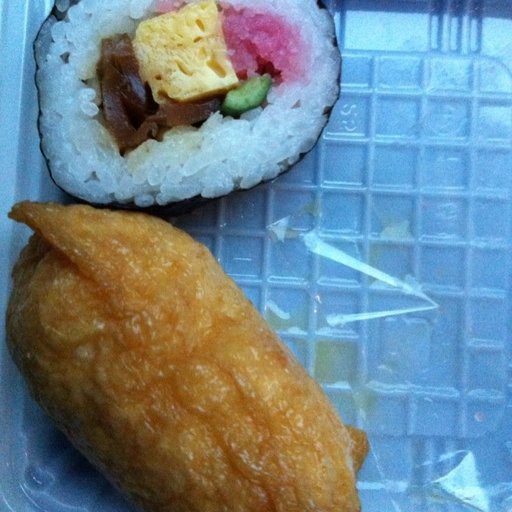

In [ ]:
import random
from PIL import Image

#get all the images path
image_path_list = list(image_path.glob("*/*/*.jpg"))

#pick a random image
random_image = random.choice(image_path_list)

#read the image by PIL

img = Image.open(random_image)

#get the class name of the image

class_name = random_image.parent.stem

#print out the img and the metadata

print(f"the image path {random_image}")
print(f"the image class {class_name}")
print(f"the image height {img.height}")
print(f"the image width {img.width}")
img

##visualizing the images by matplotlib

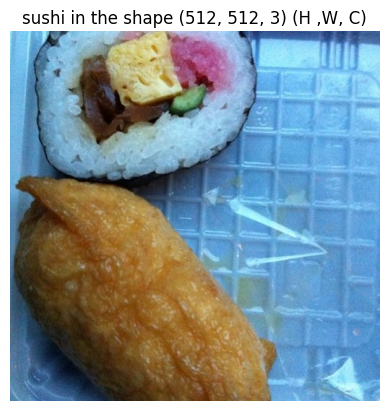

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#turn the image into an array
img_as_array = np.asarray(img)

#plot our image
plt.imshow(img_as_array)

#set up the axis
plt.title(f"{class_name} in the shape {img_as_array.shape} (H ,W, C)")
plt.axis(False);

##Data transformation

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_transform = transforms.Compose([
  #resize our images to 64 * 64
  transforms.Resize(size = (64 ,64)),
  #flip our images randomly
  transforms.RandomHorizontalFlip(p = 0.5),
  #turn our images into tensors
  transforms.ToTensor()
])


In [ ]:
data_transform(img)

tensor([[[0.2392, 0.2392, 0.2471,  ..., 0.4863, 0.4902, 0.4902],
         [0.2706, 0.2784, 0.2941,  ..., 0.4824, 0.4824, 0.4667],
         [0.4549, 0.4824, 0.5020,  ..., 0.4980, 0.4706, 0.4471],
         ...,
         [0.3686, 0.4000, 0.4471,  ..., 0.3059, 0.3216, 0.3569],
         [0.4000, 0.3490, 0.4157,  ..., 0.3176, 0.3490, 0.3882],
         [0.4549, 0.3804, 0.4431,  ..., 0.3412, 0.3725, 0.3412]],

        [[0.3725, 0.3765, 0.3843,  ..., 0.8039, 0.7725, 0.7647],
         [0.4196, 0.4353, 0.4471,  ..., 0.8000, 0.7725, 0.7490],
         [0.6706, 0.7137, 0.7294,  ..., 0.8000, 0.7725, 0.7451],
         ...,
         [0.6431, 0.6667, 0.7373,  ..., 0.4824, 0.4980, 0.5373],
         [0.6627, 0.6118, 0.6980,  ..., 0.4941, 0.5294, 0.5608],
         [0.6863, 0.6471, 0.7137,  ..., 0.5333, 0.5686, 0.5373]],

        [[0.5922, 0.5804, 0.5922,  ..., 0.9569, 0.9373, 0.9059],
         [0.6314, 0.6471, 0.6627,  ..., 0.9608, 0.9412, 0.8980],
         [0.8549, 0.8824, 0.9059,  ..., 0.9529, 0.9412, 0.

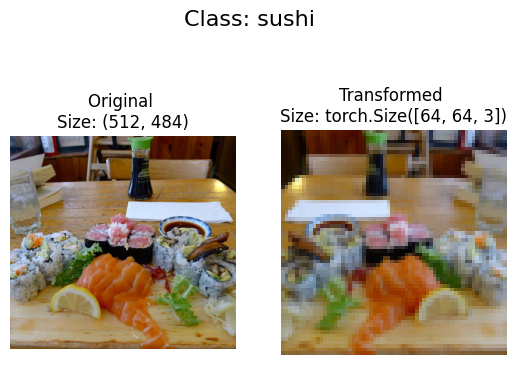

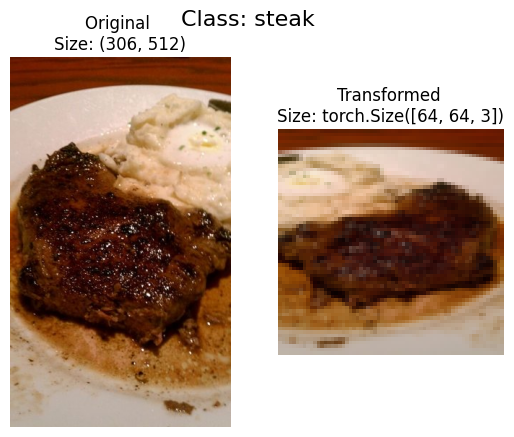

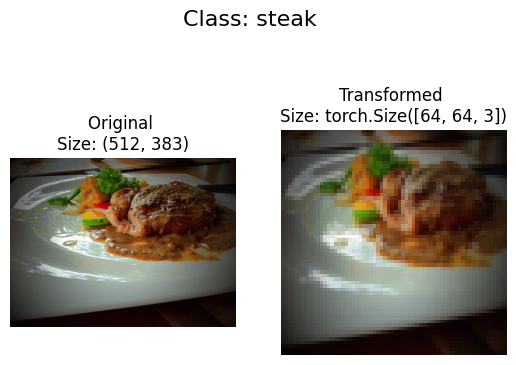

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

##Loading dataset with imageFolder

In [ ]:
#use ImageFolder to creat the dataset
from torchvision import datasets

train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform)



In [ ]:
train_data , test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
#show th number of samples in each data
len(train_data) , len(test_data)

(225, 75)

In [ ]:
#show the label as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
#show the label as a dict
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
#get the radnom sample after transformation to tensors
random_idx = torch.randint (0 , len(train_data) , size = [1]).item()

#get that sample based on this random index
img , label = train_data[random_idx][0] , train_data[random_idx][1]

#get the metadata
print(f"the image shape = {img.shape} [c, h, w]")
print(f"the image type = {img.dtype}")
print(f"the image label number = {label}")
print(f"the image label = {class_names[label]}")
print(f"the label type = {type(label)}")

the image shape = torch.Size([3, 64, 64]) [c, h, w]
the image type = torch.float32
the image label number = 2
the image label = sushi
the label type = <class 'int'>


the shape after permuting = torch.Size([64, 64, 3]) [h, w, c]
the type of the image = torch.float32


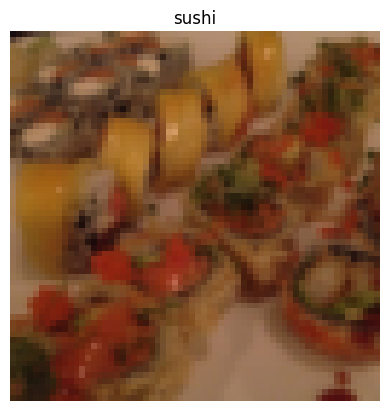

In [ ]:
#plot the random sample
#1.rearange the shape
img_permute = img.permute(1 , 2 , 0) # [h ,w , c] for matplotlib

#print out the shape of the image after permuting
print(f"the shape after permuting = {img_permute.shape} [h, w, c]")
#print the type of the image
print(f"the type of the image = {img_permute.dtype}")
#plot the image
plt.imshow(img_permute)
#set the title to class name
plt.title(f"{class_names[label]}")
#set the axis off
plt.axis(False);

#Turning the dataset into dataloader

In [ ]:
from torch.utils.data import DataLoader
#set up the batch size
BATCH_SIZE = 1

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True,
                              num_workers = 1)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False,
                              num_workers = 1)


In [ ]:
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f0efe2236d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f0efe1be080>)

In [ ]:
img , label = next (iter(train_dataloader))
print(f"Image shape = {img.shape} [batch_size ,c ,h ,w]")
print(f"label shape = {label.shape}")

Image shape = torch.Size([1, 3, 64, 64]) [batch_size ,c ,h ,w]
label shape = torch.Size([1])


#Loading images using custom dataset without using imagefolder

In [ ]:
import os
import torch
import pathlib
from PIL import Image
from typing import Tuple , Dict , List
from torchvision import transforms
from torch.utils.data import Dataset


In [ ]:
def find_classes (directory :str):
  """
  find the class name
  return , list of class names , dict of class names
  """
  #traveser over the dir by os.scandir()
  classes = [entry.name for entry in os.scandir(directory) if entry.is_dir()] #return a class name

  #raise an error if the dir didnt exist
  if not classes:
    raise FileNotFoundError(f"there is no classe in this dir....")

  #turn the classe into dict
  class_to_idx ={class_name : i for i , class_name in enumerate(classes)}

  return classes , class_to_idx

In [ ]:
find_classes(train_dir)

(['steak', 'pizza', 'sushi'], {'steak': 0, 'pizza': 1, 'sushi': 2})

In [ ]:
#build a custom image folder
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  #build an __init__()
  def __init__(self,
               target_dir :str,
               transform = None):

    #get the dataset in the list
    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))

    #setup transformation
    self.transform = transform

    #creat sub classes to get the dataset labels
    classes , class_to_idx = find_classes(target_dir)

  #overwrite the __len__()
  def __len__(self):
    #get the length of the dataset
    return len(self.paths)

  #get the image and open it
  def load_image (self , index:int):
    img =  self.paths[index]
    #open the image py PIL
    return Image.open(img)

  #overwrite the __getitem__()
  def __getitem__(self,index : int):
    img = self.paths[index]
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transfrom(img) , class_idx,

    else:
      return img , class_idx




In [ ]:
train_data_custom = ImageFolderCustom(
    target_dir=train_dir,
    transform = data_transform
)

test_data_custom = ImageFolderCustom(
    target_dir=test_dir,
    transform = data_transform
)


In [ ]:
train_data_custom.__len__()

225

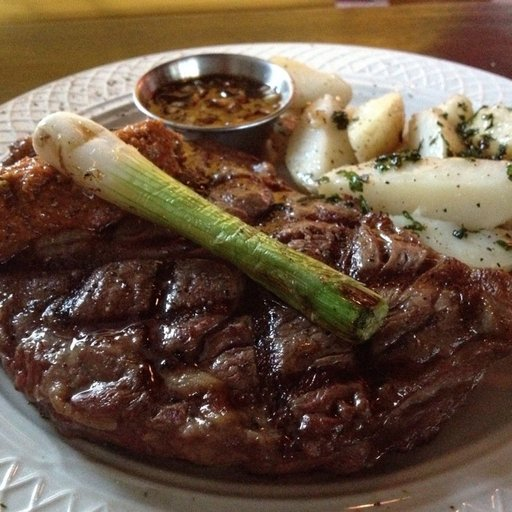

In [ ]:
train_data_custom.load_image(5)

In [ ]:
from torch.utils.data import DataLoader
BATHC_SIZE = 32

train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size = BATHC_SIZE,
                                     num_workers=0,
                                     shuffle = True)


test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                     batch_size = BATHC_SIZE,
                                     num_workers=0,
                                     shuffle = False)


In [ ]:
train_dataloader_custom , test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f0efe247880>,
 <torch.utils.data.dataloader.DataLoader at 0x7f0efe2478e0>)

In [ ]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

In [ ]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

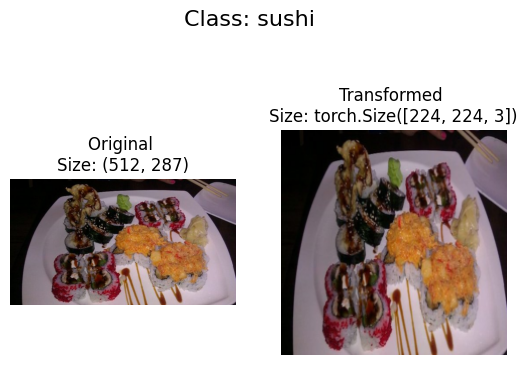

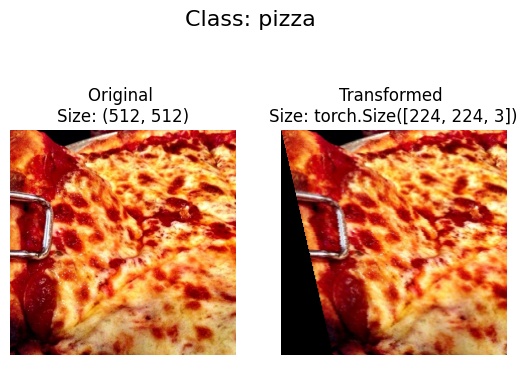

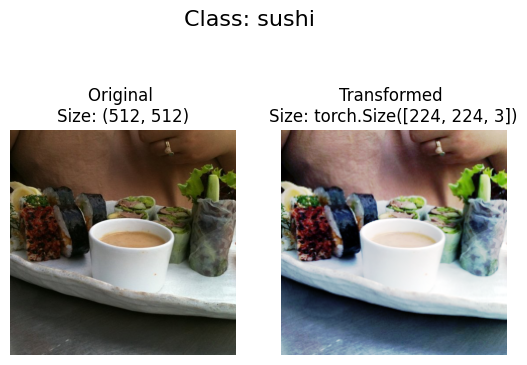

In [ ]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

#Model 0:TinyVGG without using augmantaion

In [ ]:
#transfrom the dataset
from torch.utils.data import DataLoader
from torchvision import transforms , datasets

simple_transfrom = transforms.Compose([
    #resize the image size
    transforms.Resize(size=(64 , 64)),
    #turn the datasets into tensors
    transforms.ToTensor()
])


In [ ]:
train_data_simple =  datasets.ImageFolder(root = train_dir,
                                          transform = simple_transfrom,
                                          target_transform = None)

test_data_simple = datasets.ImageFolder(root = test_dir,
                                       transform = simple_transfrom)



In [ ]:
train_data_simple , test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
#turn the dataset into dataloader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                      batch_size = BATCH_SIZE,
                                      num_workers = NUM_WORKERS,
                                     shuffle = True)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                      batch_size = BATCH_SIZE,
                                      num_workers = NUM_WORKERS,
                                     shuffle = False)

In [ ]:
#build a tinyVgg
class TinyVGG(nn.Module):
  """
  this model archeticture will be for tinyvgg model
  """
  def __init__(self,
               input_shape : int,
               hidden_units : int,
               output_shape : int):

    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),

        nn.Conv2d(in_channels = hidden_units,
          out_channels = hidden_units,
          kernel_size = 3,
          stride = 1,
          padding = 0),

        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 0),
      nn.ReLU(),

      nn.Conv2d(in_channels = hidden_units,
        out_channels = hidden_units,
        kernel_size = 3,
        stride = 1,
        padding = 0),

      nn.ReLU(),
      nn.MaxPool2d(kernel_size = 2,
                    stride = 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 13 * 13,
                  out_features = output_shape)
    )

  def forward (self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x




In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape= len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
#get the rigth shape after the flatten layer
image_batch , label_batch = next(iter(train_dataloader_simple))
image_batch.shape , label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model_0(image_batch.to(device)) # the size is 32 * 1690  ->> 32 * 10 * 13 * 13

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

##using torchinfo

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo



In [ ]:
from torchinfo import summary

summary(model_0 , input_size = [1 , 3 , 64 , 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

##building the training loop

In [ ]:
def train_step (model:nn.Module,
                dataloader: torch.utils.data.DataLoader,
                loss_fn : nn.Module,
                optimizer : torch.optim.Optimizer,
                device = device):
  #setup the trainin mood
  model.train()

  #setup the loss
  train_loss , train_acc = 0 ,0

  #loop through the data
  for batch , (X , y) in enumerate(dataloader):
    #turn the dataset in the rigth device
    X , y = X.to(device) , y.to(device)

    #forward pass
    y_pred = model(X) #the output is logits

    #calculate the loss
    loss = loss_fn(y_pred , y)
    train_loss += loss.item()

    #setup zero grad
    optimizer.zero_grad()

    #backward
    loss.backward()

    #make step to chage the weights
    optimizer.step()

    # Calculate and accumulate accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  #get the average of the accuracy
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


In [ ]:
#creat the test loop
def test_step(model:nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn : nn.Module,
              device = device):
  #setup the test mode
  model.eval()

  #setup the losses
  test_loss , test_acc = 0, 0
  with torch.no_grad():
    for batch , (X , y) in enumerate(dataloader):
        #move the data to device
        X, y = X.to(device), y.to(device)

        #forward pass
        y_pred = model(X)

        #calculate the loss
        loss = loss_fn(y_pred , y)
        test_loss += loss.item()

        #calculate the accuracy
        y_pred_class = torch.argmax(torch.softmax(y_pred , dim = 1) , dim = 1)
        test_acc += (y_pred_class == y ).sum().item() / len(y_pred)

  #calculate the avg loss and accuracy
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

#creat a train fuction
def train(model:nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          loss_fn,
          optimizer:torch.optim.Optimizer,
          epochs :int,
          device=device):

  #make a dict to store the losses and accuracy
  results = {'train_loss' : [],
             'train_acc' : [],
             'test_loss' : [],
             'test_acc' : []}

  for epoch in tqdm(range(epochs)):
    train_loss , train_acc = train_step(model,
                                        train_dataloader,
                                        loss_fn,
                                        optimizer,
                                        device)

    test_loss , test_acc = test_step(model,
                                     test_dataloader,
                                     loss_fn,
                                     device)


    #print out what is happining
    print(f"Epoch: {epoch} | train_loss : {train_loss:.4} | train_acc : {train_acc:0.2f} | test_loss : {test_loss : 0.4} | test_acc : {test_acc : 0.2}.")

    #store results in the dict
    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

  return results




In [ ]:
#get an instant from the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)


model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(class_names)).to(device)

model_0


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
#setup the loss function
loss_fn = nn.CrossEntropyLoss()

#setup the optimizer
optimizer = torch.optim.Adam(model_0.parameters(),
                            lr = 0.001)

In [ ]:
#import the timer
from timeit import default_timer as timer

start_time = timer()

#setup the number of epochs
EPOCH = 5

#Train model_0
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader_simple,
                        test_dataloader = test_dataloader_simple,
                        loss_fn = loss_fn,
                        optimizer = optimizer,
                        epochs = EPOCH,
                        device = device)

end_time = timer()

#print out the time that out model took
print(f"the time that our model took = {end_time - start_time : 0.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | train_loss : 1.106 | train_acc : 0.30 | test_loss :  1.098 | test_acc :  0.3.
Epoch: 1 | train_loss : 1.1 | train_acc : 0.33 | test_loss :  1.07 | test_acc :  0.54.
Epoch: 2 | train_loss : 1.087 | train_acc : 0.49 | test_loss :  1.081 | test_acc :  0.49.
Epoch: 3 | train_loss : 1.085 | train_acc : 0.40 | test_loss :  1.061 | test_acc :  0.57.
Epoch: 4 | train_loss : 1.066 | train_acc : 0.42 | test_loss :  1.066 | test_acc :  0.56.
the time that our model took =  5.498


In [ ]:
def plot_loss_curves(results : Dict[str , list[float]]):
  """
  plot training curves of results dictionary
  """
  #get the losses from the results dict
  train_loss = results['train_loss']
  test_loss = results['test_loss']

  #get the accuracy from the results dict
  train_acc = results['train_acc']
  test_acc = results['test_acc']

  # Figure out how many epochs there were
  epochs = range(len(results['train_loss']))

  #setup the figure size
  plt.figure(figsize = (15 , 7))

  #plot the losses
  plt.subplot(1 , 2 , 1)
  plt.plot(epochs , train_loss , label = 'train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()


  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, train_acc, label='train_accuracy')
  plt.plot(epochs, test_acc, label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

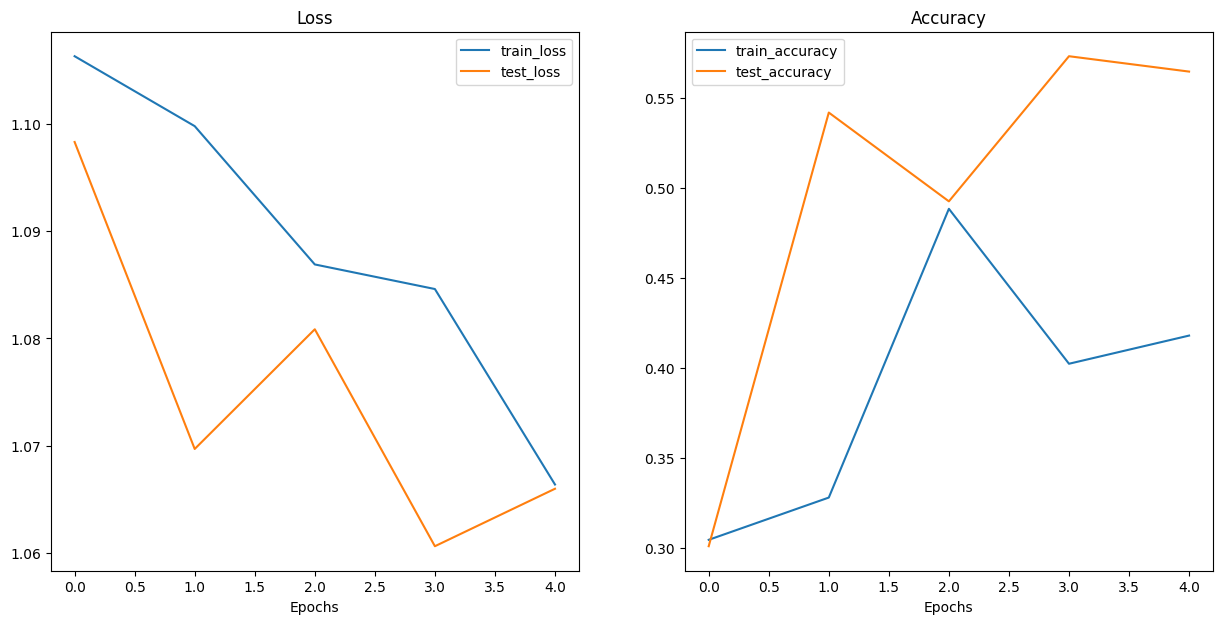

In [ ]:
plot_loss_curves(model_0_results)

##Building TinyVGG wiht data augmentation

In [ ]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
#tunn the images to dataset
from torchvision import datasets
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
#turn the datasets into dataloader
from torch.utils.data import DataLoader

# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f0efe0e34c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f0efe1be080>)

In [ ]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Create model_1 and send it to the target device
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | train_loss : 1.105 | train_acc : 0.25 | test_loss :  1.102 | test_acc :  0.26.
Epoch: 1 | train_loss : 1.081 | train_acc : 0.43 | test_loss :  1.126 | test_acc :  0.26.
Epoch: 2 | train_loss : 1.071 | train_acc : 0.43 | test_loss :  1.159 | test_acc :  0.26.
Epoch: 3 | train_loss : 1.125 | train_acc : 0.30 | test_loss :  1.158 | test_acc :  0.26.
Epoch: 4 | train_loss : 1.086 | train_acc : 0.43 | test_loss :  1.155 | test_acc :  0.33.
Total training time: 8.829 seconds


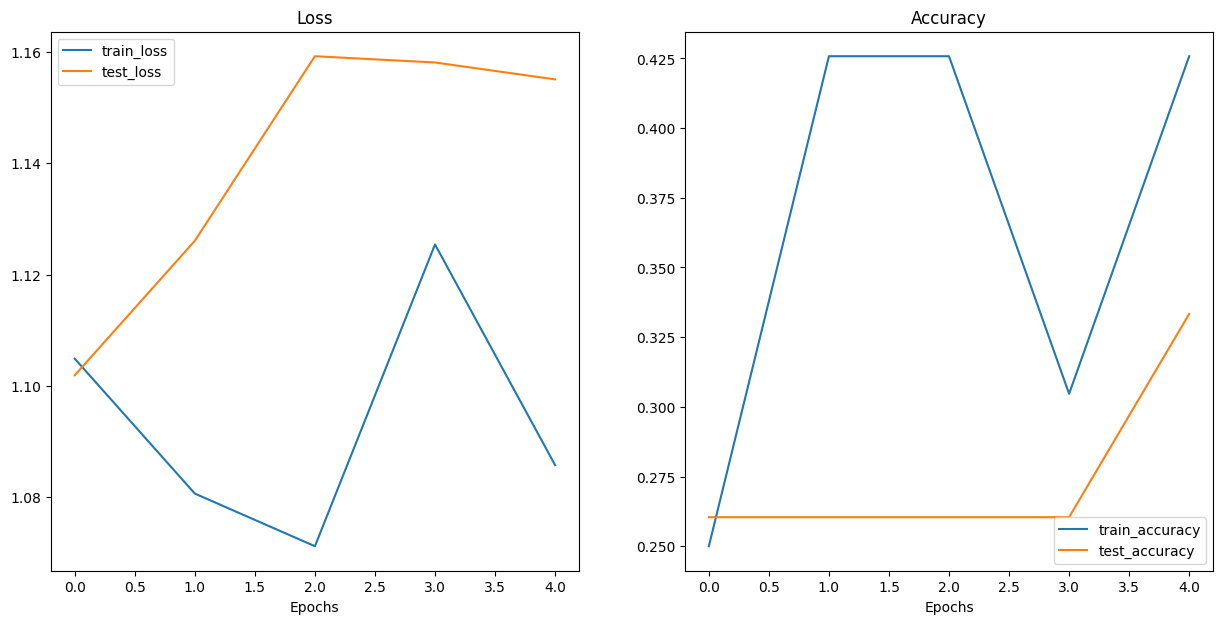

In [ ]:
plot_loss_curves(model_1_results)

## Compare model results


In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106319,0.304688,1.098321,0.301136
1,1.099799,0.328125,1.069692,0.541667
2,1.086901,0.488281,1.080855,0.492424
3,1.084608,0.402344,1.060622,0.572917
4,1.066377,0.417969,1.065982,0.564394


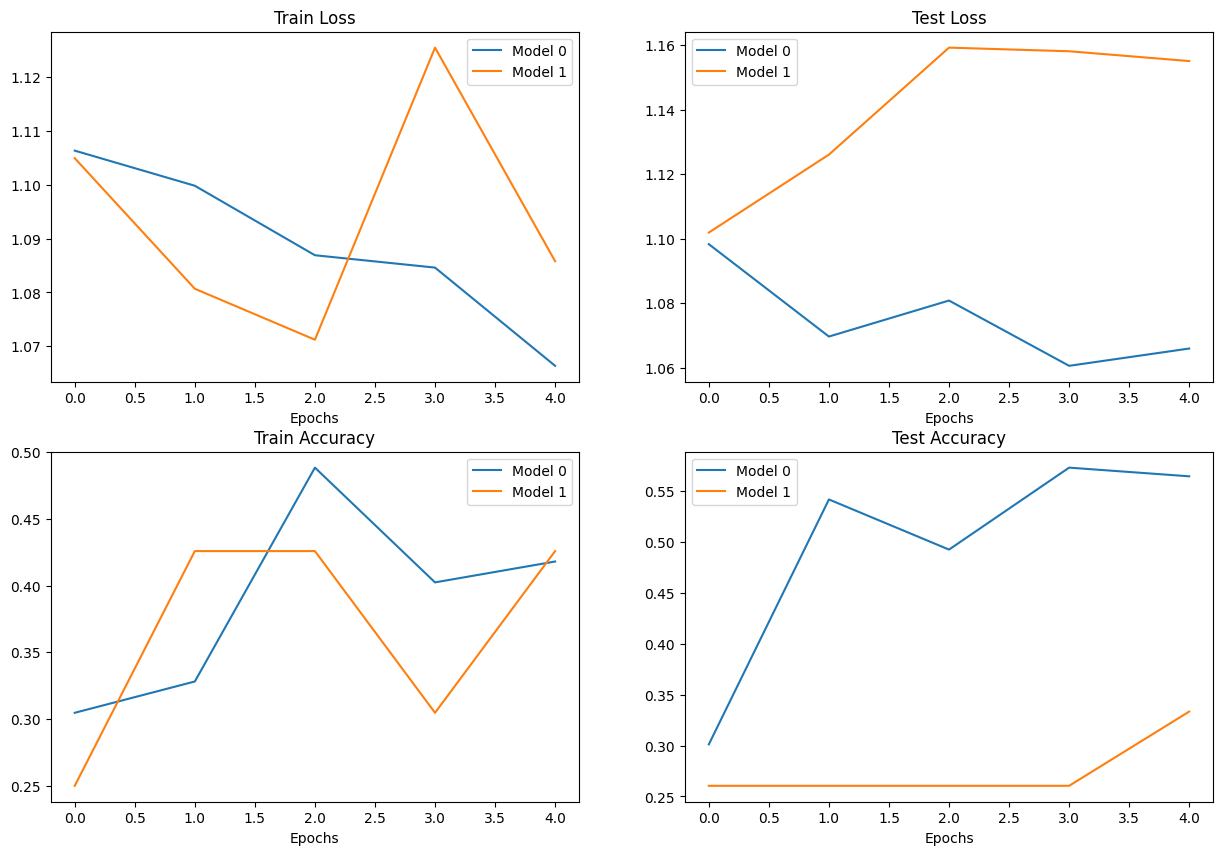

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

##Make a prediction on a custom image



In [ ]:
import requests

custom_image_path = data_path / "04-pizza-dad.jpeg"

#doawnload it if the image dooes not exist
if not custom_image_path.is_file():
  with open(custom_image_path, 'wb') as f:
    #request the image from githup
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [ ]:
import torchvision
custom_image_unit8 = torchvision.io.read_image(str(custom_image_path))
print(f"our custom image : {custom_image_unit8}")
print(f"the shape of our image : {custom_image_unit8.shape}")
print(f"the type of our image : {custom_image_unit8.dtype}")

our custom image : tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
the shape of our image : torch.Size([3, 4032, 3024])
the type of our

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

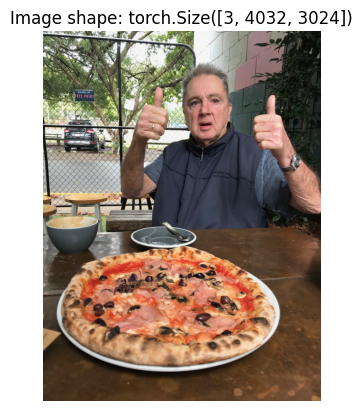

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [ ]:
custom_image_pred

tensor([[ 0.0692,  0.0510, -0.2059]], device='cuda:0')

In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.0692,  0.0510, -0.2059]], device='cuda:0')
Prediction probabilities: tensor([[0.3648, 0.3582, 0.2770]], device='cuda:0')
Prediction label: tensor([0], device='cuda:0')


In [ ]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'pizza'

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

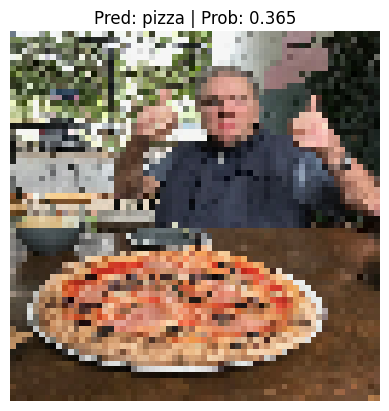

In [ ]:

# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)